In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns = map(str.lower, df.columns)
df.drop(['customerid'], axis=1, inplace=True)

In [4]:
df['totalcharges'] = df["totalcharges"].replace(" ",np.nan)

In [5]:
print((df['totalcharges'].isna().sum()/len(df))*100) # count the percentage of missing data
#Dropping null values from total charges column which contain .15% missing data 
df.dropna(inplace=True)

0.1561834445548772


In [6]:
df["totalcharges"] = df["totalcharges"].astype(float)

In [7]:
#replace 'No internet service' to No for the following columns
replace_cols = [ 'onlinesecurity', 'onlinebackup', 'deviceprotection',
                'techsupport','streamingtv', 'streamingmovies']
for i in replace_cols : 
    df[i]  = df[i].replace({'No internet service' : 'No'})

In [8]:
# replacing values
df['seniorcitizen']=df['seniorcitizen'].replace({1:'Yes',0:"No"})
df['seniorcitizen'].value_counts()

No     5890
Yes    1142
Name: seniorcitizen, dtype: int64

In [9]:

### function for plotting caterogical columns
def plot_cat(df,feature, xlabel_rotation=0 ):
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    
    # title for first subplot
    ax[0].set(xlabel = f"{feature}", ylabel=f"Number of Customers")
    # title for second subplot
    ax[1].set(xlabel = f"{feature}", ylabel=f"Number of Customers")
    
    # create subplots, parametr rot=0 - shows how we see labels for axes x
    df[df.churn == "No"][feature].value_counts().plot(kind='bar', ax=ax[0], rot=xlabel_rotation).set_title('Non churn customers')
    df[df.churn == "Yes"][feature].value_counts().plot(kind='bar', ax=ax[1], rot=xlabel_rotation).set_title('Churn Customers')
    
    # main title
    # y - how far from plot we put title (if y is small number then title connect with plots, else y is big number then title run away from plot, plot go down the page
    # size - font size for title
    # weight - type of font
    fig.suptitle(f'{feature} distribution in customer attrition', y=1.02, size=16, weight='bold')

In [10]:
df['churn'] = df['churn'].apply(lambda x: x.strip().replace("Yes", "1").replace("No", "0"))
df['churn'] = df['churn'].astype('int')

In [11]:
#### onehot encoding all caterogical data
df = pd.get_dummies(df, drop_first=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
tenure                                   7032 non-null int64
monthlycharges                           7032 non-null float64
totalcharges                             7032 non-null float64
churn                                    7032 non-null int32
gender_Male                              7032 non-null uint8
seniorcitizen_Yes                        7032 non-null uint8
partner_Yes                              7032 non-null uint8
dependents_Yes                           7032 non-null uint8
phoneservice_Yes                         7032 non-null uint8
multiplelines_No phone service           7032 non-null uint8
multiplelines_Yes                        7032 non-null uint8
internetservice_Fiber optic              7032 non-null uint8
internetservice_No                       7032 non-null uint8
onlinesecurity_Yes                       7032 non-null uint8
onlinebackup_Yes                   

In [13]:
import statsmodels.api as sm
# define y
y=df['churn'].copy()

# Define X

X = df.drop(columns=['churn'], axis=1)


# Create intercept term required for sm.Logit, see documentation for more information
X = sm.add_constant(X)

# Fit model
logit_model = sm.Logit(y, X)

# Get results of the fit
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.414269
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7008
Method:                           MLE   Df Model:                           23
Date:                Sun, 31 May 2020   Pseudo R-squ.:                  0.2845
Time:                        14:18:18   Log-Likelihood:                -2913.1
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.8340        nan        nan        nan         nan         nan
tenure                                   -0.0606      0.006     -9.716      0.000      -0.073      -0.048
monthlycharges                           -0.0403      0.032     -1.270      0.204      -0.103       0.022
totalcharges                              0.0003   7.06e-05      4.657      0.000       0.000       0.000
gender_Male                              -0.0218      0.065     -0.337      0.736      -0.149       0.105
seniorcitizen_Yes                         0.2168      0.085      2.564      0.010       0.051       0.382
partner_Yes                              -0.0004      0.078     -0.005      0.996      -0.153       0.152
dependents_Yes                           -0.1485      0.090     -1.655      0.098      -0.324       0.027
phoneservice_Yes                          0.5027        nan        nan        nan         nan         nan
multiplelines_No phone service            0.3313        nan        nan        nan         nan         nan
multiplelines_Yes                         0.4484      0.177      2.530      0.011       0.101       0.796
internetservice_Fiber optic               1.7475      0.798      2.190      0.029       0.183       3.312
internetservice_No                       -1.7863      0.807     -2.213      0.027      -3.369      -0.204
onlinesecurity_Yes                       -0.2054      0.179     -1.150      0.250      -0.556       0.145
onlinebackup_Yes                          0.0260      0.175      0.148      0.882      -0.318       0.370
deviceprotection_Yes                      0.1474      0.176      0.836      0.403      -0.198       0.493
techsupport_Yes                          -0.1805      0.181     -0.999      0.318      -0.534       0.173
streamingtv_Yes                           0.5905      0.326      1.810      0.070      -0.049       1.230
streamingmovies_Yes                       0.5993      0.327      1.834      0.067      -0.041       1.240
contract_One year                        -0.6608      0.108     -6.142      0.000      -0.872      -0.450
contract_Two year                        -1.3571      0.176     -7.691      0.000      -1.703      -1.011
paperlessbilling_Yes                      0.3424      0.074      4.596      0.000       0.196       0.488
paymentmethod_Credit card (automatic)    -0.0878      0.114     -0.770      0.442      -0.311       0.136
paymentmethod_Electronic check            0.3045      0.094      3.222      0.001       0.119       0.490
paymentmethod_Mailed check               -0.0576      0.115     -0.501      0.616      -0.283       0.168
=========================================================================================================
"""

In [14]:
df=df[['tenure', 'totalcharges', 'churn', 'seniorcitizen_Yes',
       'phoneservice_Yes', 'multiplelines_No phone service',
       'multiplelines_Yes', 'internetservice_Fiber optic',
       'internetservice_No', 'contract_One year', 'contract_Two year',
       'paperlessbilling_Yes', 'paymentmethod_Electronic check']]

In [15]:
## Define X, y and split data into training and testing
from sklearn.model_selection import train_test_split

# Split data into X and y
y=df['churn'].copy()

# Define X

X = df.drop(columns=['churn'], axis=1)



#importing train_test_split
from sklearn.model_selection import train_test_split
# Split the data into a training and a test set and set stratify=y to help with imbalance data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,
                                                 random_state=42)

In [16]:
#scale numeric features 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# Scale the train and test data
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [17]:
'''
smote
refre to install docs 
https://imbalanced-learn.readthedocs.io/en/stable/install.html
'''
from imblearn.over_sampling import SMOTE, ADASYN 

#X_resampled, y_resampled = SMOTE().fit_sample(X, y) #adding more users/non-users
#print(pd.Series(y_resampled).value_counts())

#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)

Using TensorFlow backend.


In [18]:
from imblearn.over_sampling import SMOTE, ADASYN 

#X_resampled, y_resampled = SMOTE().fit_sample(X, y) #adding more users/non-users
#print(pd.Series(y_resampled).value_counts())

#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)

In [19]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train) 
print(pd.Series(y_train_smote).value_counts())

1    3084
0    3084
dtype: int64


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import itertools
def plot_confusion_matrix(y_true, y_preds):
    # Print confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_preds)
    # Create the basic matrix
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues)
    # Add title and axis labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Add appropriate axis scales
    class_names = set(y) # Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names)
    # Add labels to each cell
    thresh = cnf_matrix.max() / 2. # Used for text coloring below
    # Here we iterate through the confusion matrix and append labels to our visualization
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'black')
    # Add a legend
    plt.colorbar();
    plt.show();
def metrics(model_name, y_train, y_test, y_hat_train, y_hat_test):
    '''Print out the evaluation metrics for a given models predictions'''
    print(f'Model: {model_name}', )
    print('-'*60)
    plot_confusion_matrix(y_test,y_hat_test)
    print(f'test accuracy: {accuracy_score(y_test, y_hat_test)}')
    print(f'train accuracy: {accuracy_score(y_train, y_hat_train)}')
    print('-'*60)
    print('-'*60)
    print('Confusion Matrix:\n', pd.crosstab(y_test, y_hat_test, rownames=['Actual'], colnames=['Predicted'],margins = True))
    print('\ntest report:\n' + classification_report(y_test, y_hat_test))
    print('~'*60)
    print('\ntrain report:\n' + classification_report(y_train, y_hat_train))
    print('-'*60)

Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
------------------------------------------------------------


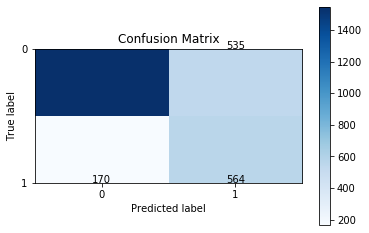

test accuracy: 0.7493778883754
train accuracy: 0.7781464802085802
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted     0     1   All
Actual                     
0          1544   535  2079
1           170   564   734
All        1714  1099  2813

test report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      2079
           1       0.51      0.77      0.62       734

    accuracy                           0.75      2813
   macro avg       0.71      0.76      0.71      2813
weighted avg       0.80      0.75      0.76      2813

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      3084
           1       0.56      0.82      0.66      1135

    accuracy                           0.78      4219
   macro avg      

In [21]:
# Instantiate and fit a RandomForestClassifier with n_estimators=100
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10,
                                criterion= 'entropy',
                                max_depth= 20,
                                min_samples_leaf= 15,
                                min_samples_split= 50)

#forest.fit(X_train, y_train)
forest.fit(X_train_smote, y_train_smote)


#predictions
y_hat_train=forest.predict(X_train)
y_hat_test = forest.predict(X_test)

# model results

metrics(forest, y_train, y_test, y_hat_train, y_hat_test)
# To get the feature importance
feature_important=forest.feature_importances_